#Design a Deep Neural Network using Keras and pyTorch

In [2]:
import keras
print(keras.__version__)

import torch
print(torch.__version__)

2.4.3
1.8.1+cu101


##Tensors and Attributes

In [3]:
data = torch.tensor([[1,2,3],[4,5,6]])
print(data.shape)
print(data.dtype) #dimesnion along each axis
print(data.ndim) #number of axes
print(data.device)

torch.Size([2, 3])
torch.int64
2
cpu


In [4]:
import numpy as np
data_np = np.array([[1,2,3],[4,5,6]])
print(data_np.shape)
print(data_np.dtype)
print(data_np.ndim)

(2, 3)
int64
2


##Special Tensors

In [58]:
np_zeros = np.zeros((3,4),dtype='uint8')
np_ones = np.ones((3,4))
np_rand = np.random.rand(3,4) # 3,4 indicates the shape of the resulting array
np_arr = np.array([[1,2],[3,4],[5,6]])
print(np_zeros.shape)
print(np_zeros.dtype)
print(np_ones.shape)
print(np_arr.shape)
print(np_arr.ndim)
print(np_arr.dtype)


(3, 4)
uint8
(3, 4)
(3, 2)
2
int64


In [8]:
shape = (2,3)
rand_tensor = torch.rand(shape)
ones_tensor = torch.ones(shape)
zeros_tensor = torch.zeros(shape)

print(rand_tensor.shape)
print(rand_tensor.ndim)
print(rand_tensor.dtype)


torch.Size([2, 3])
2
torch.float32


##Indexing and Slicing

In [9]:
tensor = torch.ones((5, 4))
tensor[:,1] = 0
print(tensor)

tensor([[1., 0., 1., 1.],
        [1., 0., 1., 1.],
        [1., 0., 1., 1.],
        [1., 0., 1., 1.],
        [1., 0., 1., 1.]])


In [14]:
np_ones = np.ones((5,4))
np_ones[:,1] = 0
print(np_ones)
print(np_ones.shape)

[[1. 0. 1. 1.]
 [1. 0. 1. 1.]
 [1. 0. 1. 1.]
 [1. 0. 1. 1.]
 [1. 0. 1. 1.]]
(5, 4)


In [60]:
torch.mean(tensor,dim=0)

tensor([30., 25., 30., 30.])

In [16]:
np.mean(np_ones,axis=0)

array([1., 0., 1., 1.])

In [17]:
tensor = tensor +5 
print(tensor)

tensor([[6., 5., 6., 6.],
        [6., 5., 6., 6.],
        [6., 5., 6., 6.],
        [6., 5., 6., 6.],
        [6., 5., 6., 6.]])


In [18]:
tensor = tensor * 5
print(tensor)

tensor([[30., 25., 30., 30.],
        [30., 25., 30., 30.],
        [30., 25., 30., 30.],
        [30., 25., 30., 30.],
        [30., 25., 30., 30.]])


In [19]:
W = torch.ones([1,4])
y = torch.matmul(W , torch.transpose(tensor,0,1))
print(y)

tensor([[115., 115., 115., 115., 115.]])


In [20]:
np_ones = np_ones * 5
W_np = np.ones((1,4))
y_np = np.dot(W,np.transpose(np_ones))
print(y_np)

[[15. 15. 15. 15. 15.]]


#Designing a Feed Forward Neural Network

## Checking for arbitrary values of w
Simple Function y = w * x 
x single dimensional Tensor
y single scalar value for wach sample

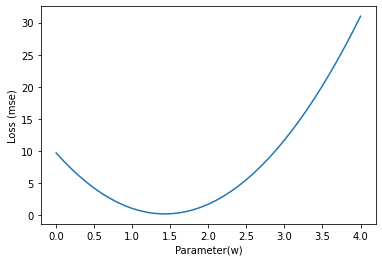

In [21]:
import numpy as np
from matplotlib import pyplot as plt

x_data =[1.0,2.0,3.0]
y_data =[2.0,3.0,4.0]
w = 1.0

def forward(x):
	return w*x

def loss(x,y):
	y_pred = forward(x)
	return (y_pred-y) * (y_pred - y)

mse_list = []
w_list = []
for w in np.arange(0.0,4.1,0.1):
	l=0;
	for x,y in zip(x_data,y_data):
		l = l+loss(x,y)
	mse_list.append(l/3)
	w_list.append(w)

#print(mse_list)
#print(w_list)

plt.plot(w_list,mse_list)
plt.xlabel('Parameter(w)')
plt.ylabel('Loss (mse)')
plt.show()

## Gradient Descent Computation

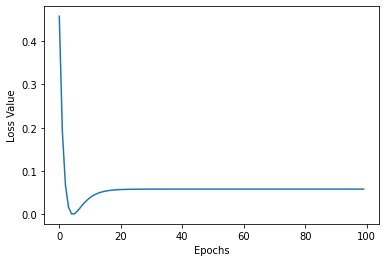

1.4138587123304174


In [61]:
import numpy as np
from matplotlib import pyplot as plt

x_data =[1.0,2.0,3.0]
y_data =[2.0,3.0,4.0]
w = 1.0

def forward(x):
	return w*x

def loss(x,y):
	y_pred = forward(x)
	return (y_pred-y) * (y_pred - y)

def gradient(x,y,w):
	return 2*x*(w*x-y)

epochs=[]
loss_epoch=[]
for epoch in range(100):
	for(x,y) in zip(x_data,y_data):
		grad = gradient(x,y,w)
		w =  w - grad*0.01
		l = loss(x,y)
	#print(str(epoch)+":"+str(l))
	epochs.append(epoch)
	loss_epoch.append(l)



plt.plot(epochs,loss_epoch)
plt.xlabel('Epochs')
plt.ylabel('Loss Value')
plt.show()
print(w)

# Keras Workflow

In [78]:
import numpy as np
from keras import models
from keras import layers

# Define Data
x_data =np.array([1.0,2.0,3.0])
y_data =np.array([2.0,3.0,4.0])

#Define layers in the model
model = models.Sequential()
model.add(layers.Dense(1, use_bias=False, input_shape=(1,)))

print(model.summary())

Model: "sequential_7"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_9 (Dense)              (None, 1)                 1         
Total params: 1
Trainable params: 1
Non-trainable params: 0
_________________________________________________________________
None


In [79]:
#Configure the learning process
from keras import optimizers
import keras
model.compile(optimizer='sgd', loss='mse', metrics=keras.metrics.MeanSquaredError())

#Iterate the training data using fit
hist = model.fit(x_data.reshape(3,1),y_data.reshape(3,1),batch_size=1,epochs=100)

Epoch 1/100
3/3 [==============================] - 0s 3ms/step - loss: 0.1077 - mean_squared_error: 0.1077    
Epoch 2/100
3/3 [==============================] - 0s 3ms/step - loss: 0.1666 - mean_squared_error: 0.1666
Epoch 3/100
3/3 [==============================] - 0s 3ms/step - loss: 0.1350 - mean_squared_error: 0.1350
Epoch 4/100
3/3 [==============================] - 0s 3ms/step - loss: 0.1013 - mean_squared_error: 0.1013
Epoch 5/100
3/3 [==============================] - 0s 3ms/step - loss: 0.0982 - mean_squared_error: 0.0982
Epoch 6/100
3/3 [==============================] - 0s 2ms/step - loss: 0.2168 - mean_squared_error: 0.2168
Epoch 7/100
3/3 [==============================] - 0s 2ms/step - loss: 0.0957 - mean_squared_error: 0.0957
Epoch 8/100
3/3 [==============================] - 0s 3ms/step - loss: 0.2141 - mean_squared_error: 0.2141
Epoch 9/100
3/3 [==============================] - 0s 3ms/step - loss: 0.1278 - mean_squared_error: 0.1278
Epoch 10/100
3/3 [===============

In [27]:
for layer in model.layers: 
  print(layer.get_weights())

[array([[1.4246372]], dtype=float32)]


loss
mean_squared_error


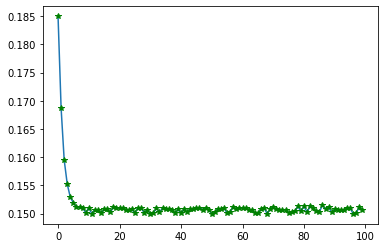

In [91]:
for key,value in hist.history.items():
  print(key)

hist.history['loss']
plt.plot(hist.history['loss'])
plt.plot(hist.history['mean_squared_error'],'g*')
plt.show()

In [97]:
model.predict([[8.1]])

array([[11.515258]], dtype=float32)

In [94]:
for layer in model.layers:
  print(layer.get_weights())

[array([[1.4216367]], dtype=float32)]


# PyTorch Workflow

```
# This is formatted as code
```



Autograd and NN in pyTorch

In [70]:
import torch

a = torch.tensor([2.,3.], requires_grad=True) #requires_grad is not set, gradient will noot be computed for that tensor
b = torch.tensor([6.,3.], requires_grad=True)
Q = 3*a**3 - b**2


#Explixitly mention the gradient computation
external_grad = torch.tensor([1.,1.]) # Number of input values for which gradient to be computed
Q.backward(gradient=external_grad) # Computes gradients and store the information in the tensors grad attribute


print(9*a**2 == a.grad)
print(-2*b == b.grad)


tensor([True, True])
tensor([True, True])


In [29]:
import torch
# Define Data
x_data =np.array([1.0,2.0,3.0])
y_data =np.array([2.0,3.0,4.0])
x_data = x_data.reshape((3,1))
y_data = y_data.reshape((3,1))

x_tensor = torch.from_numpy(x_data)
y_tensor = torch.from_numpy(y_data)

In [74]:
#nn depends on autograd to define models and differentiate them. An nn.Module contains layers, and a method forward(input) that returns the output.
#Define architecture
import torch
import torch.nn as nn
import torch.nn.functional as F


class Net(nn.Module):

    def __init__(self):
        super(Net, self).__init__()
        
        # an affine operation: y = Wx + b
        self.fc1 = nn.Linear(1, 1,bias=False)  # 13 feature dimension
        
    def forward(self, x):
        x = self.fc1(x)
        return x

In [75]:
model = Net()
print(model)

Net(
  (fc1): Linear(in_features=1, out_features=1, bias=False)
)


In [32]:
params = list(model.parameters()) # Each layer contains Weight and Biases
print(len(params))
print(params[0].shape) 


1
torch.Size([1, 1])


In [33]:
print(params[0].requires_grad)
print(params[0].dtype)
print(type(params[0]))

True
torch.float32
<class 'torch.nn.parameter.Parameter'>


In [76]:
# Configure the training process
Criterion = torch.nn.MSELoss()
optimizer = torch.optim.SGD(model.parameters(),lr=0.01)


#Train_Model
epoch_list=[]
loss_list=[]
for epoch in range(100):
  
  out = model(x_tensor.float())
  loss = Criterion(out, y_tensor.float() )
  
  optimizer.zero_grad()
  loss.backward()
  optimizer.step()

  epoch_list.append(epoch)
  loss_list.append(loss)


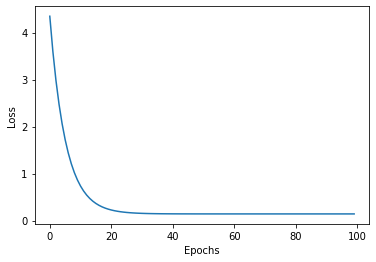

In [77]:
from matplotlib import pyplot as plt
plt.plot(epoch_list,loss_list)
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.show()

In [36]:
print(params[0])

Parameter containing:
tensor([[1.4285]], requires_grad=True)


# Regression Example

> Predict Median Price of home based on certain statistics about the area



## Keras Model

It takes as an input a two dimensional array with 404 samples and 13 features 
Predicts a single sclar value for y

In [98]:
from keras.datasets import boston_housing

(train_data,train_targets) , (test_data,test_targets) =  boston_housing.load_data()
print(train_data.shape)
print(test_data.shape)

(404, 13)
(102, 13)


In [99]:
train_data.mean(axis=0)

array([3.74511057e+00, 1.14801980e+01, 1.11044307e+01, 6.18811881e-02,
       5.57355941e-01, 6.26708168e+00, 6.90106436e+01, 3.74027079e+00,
       9.44059406e+00, 4.05898515e+02, 1.84759901e+01, 3.54783168e+02,
       1.27408168e+01])

In [38]:
#Preparing Data
mean = train_data.mean(axis=0)
train_data -=mean
std = train_data.std(axis=0)
train_data /=std

test_data -=mean
test_data /=std

In [39]:
print(test_targets)

[ 7.2 18.8 19.  27.  22.2 24.5 31.2 22.9 20.5 23.2 18.6 14.5 17.8 50.
 20.8 24.3 24.2 19.8 19.1 22.7 12.  10.2 20.  18.5 20.9 23.  27.5 30.1
  9.5 22.  21.2 14.1 33.1 23.4 20.1  7.4 15.4 23.8 20.1 24.5 33.  28.4
 14.1 46.7 32.5 29.6 28.4 19.8 20.2 25.  35.4 20.3  9.7 14.5 34.9 26.6
  7.2 50.  32.4 21.6 29.8 13.1 27.5 21.2 23.1 21.9 13.  23.2  8.1  5.6
 21.7 29.6 19.6  7.  26.4 18.9 20.9 28.1 35.4 10.2 24.3 43.1 17.6 15.4
 16.2 27.1 21.4 21.5 22.4 25.  16.6 18.6 22.  42.8 35.1 21.5 36.  21.9
 24.1 50.  26.7 25. ]


In [40]:
def build_model():
  model = models.Sequential()
  model.add(layers.Dense(64, activation='relu', input_shape=(train_data.shape[1],)))
  model.add(layers.Dense(64, activation='relu'))
  model.add(layers.Dense(1))
  model.compile(optimizer='rmsprop',loss='mse',metrics=['mse'])
  return model

In [100]:
model = build_model()
history = model.fit(train_data, train_targets, epochs=100, batch_size=4)

Epoch 1/100
101/101 [==============================] - 1s 2ms/step - loss: 256.9818 - mse: 256.9818
Epoch 2/100
101/101 [==============================] - 0s 2ms/step - loss: 155.9660 - mse: 155.9660
Epoch 3/100
101/101 [==============================] - 0s 2ms/step - loss: 116.8007 - mse: 116.8007
Epoch 4/100
101/101 [==============================] - 0s 2ms/step - loss: 85.8233 - mse: 85.8233
Epoch 5/100
101/101 [==============================] - 0s 2ms/step - loss: 95.6000 - mse: 95.6000
Epoch 6/100
101/101 [==============================] - 0s 2ms/step - loss: 77.5281 - mse: 77.5281
Epoch 7/100
101/101 [==============================] - 0s 2ms/step - loss: 78.5830 - mse: 78.5830
Epoch 8/100
101/101 [==============================] - 0s 2ms/step - loss: 64.5642 - mse: 64.5642
Epoch 9/100
101/101 [==============================] - 0s 2ms/step - loss: 66.0230 - mse: 66.0230
Epoch 10/100
101/101 [==============================] - 0s 2ms/step - loss: 78.5776 - mse: 78.5776
Epoch 11/100


In [42]:
model.evaluate(test_data,test_targets)

4/4 [==============================] - 0s 3ms/step - loss: 12.6808 - mse: 12.6808


[12.680828094482422, 12.680828094482422]

In [101]:
model.predict(test_data[5:7])

array([[19.936472],
       [30.262636]], dtype=float32)

In [103]:
test_targets[6]

31.2

## pyTorch Model

In [45]:
#nn depends on autograd to define models and differentiate them. An nn.Module contains layers, and a method forward(input) that returns the output.
import torch
import torch.nn as nn
import torch.nn.functional as F


class Net(nn.Module):

    def __init__(self):
        super(Net, self).__init__()
        
        # an affine operation: y = Wx + b
        self.fc1 = nn.Linear(13, 64)  # 13 feature dimension
        self.fc2 = nn.Linear(64, 64)
        self.fc3 = nn.Linear(64,1)
        
    def forward(self, x):
        x = F.relu(self.fc1(x))
        x = F.relu(self.fc2(x))
        x = self.fc3(x)
        return x

In [46]:
model = Net()
print(model)

Net(
  (fc1): Linear(in_features=13, out_features=64, bias=True)
  (fc2): Linear(in_features=64, out_features=64, bias=True)
  (fc3): Linear(in_features=64, out_features=1, bias=True)
)


In [47]:
params = list(model.parameters()) # Each layer contains Weight and Biases
print(len(params))
print(params[0].shape) 


6
torch.Size([64, 13])


In [48]:
print(params[0].requires_grad)
print(params[0].dtype)
print(type(params[0]))

True
torch.float32
<class 'torch.nn.parameter.Parameter'>


In [49]:
tensor_train_data = torch.from_numpy(train_data)
tensor_train_targets = torch.from_numpy(train_targets)


In [50]:
tensor_train_targets= tensor_train_targets.view((404,1))

In [51]:
out = model(tensor_train_data.float())
print(out.shape)

torch.Size([404, 1])


In [52]:
Criterion = torch.nn.MSELoss()
optimizer = torch.optim.RMSprop(model.parameters())


In [53]:
loss = Criterion(out, tensor_train_targets.float() )

In [54]:
dataset = torch.utils.data.TensorDataset(tensor_train_data, tensor_train_targets)


In [55]:
trainloader = torch.utils.data.DataLoader(dataset, batch_size=4,shuffle=True)

In [56]:
for epoch in range(100):  # loop over the dataset multiple times

    running_loss = 0.0
    for i, data in enumerate(trainloader, 0):
        # get the inputs; data is a list of [inputs, labels]
        inputs, labels = data

        # zero the parameter gradients
        optimizer.zero_grad()

        # forward + backward + optimize
        outputs =model(inputs.float())
        loss = Criterion(outputs, labels.float())
        loss.backward()
        optimizer.step()

        # print statistics
        running_loss += loss.item()
        if i % 101 == 100:    # print every 2000 mini-batches
            print('[%d, %5d] loss: %.3f' %
                  (epoch + 1, i + 1, running_loss / 101))
            running_loss = 0.0
      

print('Finished Training')


[1,   101] loss: 78.432
[2,   101] loss: 18.495
[3,   101] loss: 17.509
[4,   101] loss: 17.206
[5,   101] loss: 16.337
[6,   101] loss: 15.303
[7,   101] loss: 16.745
[8,   101] loss: 14.691
[9,   101] loss: 14.048
[10,   101] loss: 14.847
[11,   101] loss: 12.403
[12,   101] loss: 10.982
[13,   101] loss: 14.589
[14,   101] loss: 9.358
[15,   101] loss: 14.457
[16,   101] loss: 10.647
[17,   101] loss: 11.410
[18,   101] loss: 11.863
[19,   101] loss: 10.675
[20,   101] loss: 9.730
[21,   101] loss: 10.887
[22,   101] loss: 10.237
[23,   101] loss: 10.924
[24,   101] loss: 10.314
[25,   101] loss: 9.279
[26,   101] loss: 8.366
[27,   101] loss: 7.586
[28,   101] loss: 10.110
[29,   101] loss: 8.661
[30,   101] loss: 8.857
[31,   101] loss: 8.073
[32,   101] loss: 7.731
[33,   101] loss: 9.442
[34,   101] loss: 8.106
[35,   101] loss: 8.097
[36,   101] loss: 7.034
[37,   101] loss: 10.409
[38,   101] loss: 6.828
[39,   101] loss: 7.440
[40,   101] loss: 6.462
[41,   101] loss: 7.952
[

In [57]:
tensor_test_data = torch.from_numpy(test_data)
tensor_test_data = tensor_test_data.float()
print(model(tensor_test_data[5]))

tensor([22.9501], grad_fn=<AddBackward0>)


In [106]:
print(test_targets[5])

24.5
